In [2]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [3]:
from sklearn.decomposition import PCA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/olgan96/.env/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
import pandas as pd

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_parquet('../../NO_BACKUP/tahoe/final_tahoe_no_overlappings.parquet')


In [8]:
df

,index,cl_sm_dose,cell_line,drug,dose,pubchem_cid,cell_line_drug,responses,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
0,67,CVCL_0069_APTO-253_0.05,CVCL_0069,APTO-253,0.05,11960271,CVCL_0069_11960271,0.999736,CC1=C(C2=C(N1)C=CC(=C2)F)C3=NC4=C5C=CC=NC5=C6C...,0,...,1.861418,-1.113724,0.545364,-1.035998,-1.050404,-1.013388,-0.448658,0.000000,0.854815,0.973242
1,68,CVCL_0069_AZD-7648_0.05,CVCL_0069,AZD-7648,0.05,135151360,CVCL_0069_135151360,0.988290,CC1=CC2=NC=NN2C=C1NC3=NC=C4C(=N3)N(C(=O)N4C)C5...,0,...,1.701611,-1.200000,0.757024,-1.073870,-2.592207,0.059973,-0.165119,0.000000,1.028941,0.734825
2,69,CVCL_0069_AZD-8055_0.05,CVCL_0069,AZD-8055,0.05,25262965,CVCL_0069_25262965,0.786794,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,0,...,0.605908,-0.974630,0.991741,-0.928049,-2.631717,-0.415128,-0.756783,0.000000,1.175194,0.140158
3,70,CVCL_0069_AZD1390_0.05,CVCL_0069,AZD1390,0.05,126689157,CVCL_0069_126689157,1.000000,CC(C)N1C2=C(C=NC3=CC(=C(C=C32)C4=CN=C(C=C4)OCC...,0,...,1.202355,-1.610269,1.088643,-1.030269,-2.495177,-0.635733,-0.632332,0.000000,1.110014,0.363301
4,71,CVCL_0069_Afatinib_0.05,CVCL_0069,Afatinib,0.05,10184653,CVCL_0069_10184653,0.990883,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,0,...,0.379006,-1.431053,-0.713355,-1.472717,-0.487054,0.452793,-0.250100,0.000000,0.337853,0.223940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,7978,CVCL_1731_5-Fluorouracil_0.5,CVCL_1731,5-Fluorouracil,0.50,3385,CVCL_1731_3385,0.923447,C1=C(C(=O)NC(=O)N1)F,0,...,1.684694,-0.625037,-1.846971,-0.312898,0.630495,-0.011337,0.936636,0.113086,-0.798684,0.454878
3317,7981,CVCL_1731_Belinostat_0.5,CVCL_1731,Belinostat,0.50,6918638,CVCL_1731_6918638,0.912687,C1=CC=C(C=C1)NS(=O)(=O)C2=CC=CC(=C2)C=CC(=O)NO,0,...,0.000000,-0.759764,-1.668616,-0.228991,-0.926570,-0.181311,1.156408,0.000000,-0.016793,0.744082
3318,7990,CVCL_1731_Fulvestrant_0.5,CVCL_1731,Fulvestrant,0.50,104741,CVCL_1731_104741,0.901148,CC12CCC3C(C1CCC2O)C(CC4=C3C=CC(=C4)O)CCCCCCCCC...,0,...,1.766649,-1.682095,-1.319940,-0.924046,-1.253834,-1.525262,1.179120,0.200925,0.015409,0.524940
3319,7997,CVCL_1731_Panobinostat_0.5,CVCL_1731,Panobinostat,0.50,6918837,CVCL_1731_6918837,0.470417,CC1=C(C2=CC=CC=C2N1)CCNCC3=CC=C(C=C3)C=CC(=O)NO,0,...,0.806367,-0.805154,-0.687915,-3.087473,-0.539735,1.091674,-1.113487,0.000000,0.600180,0.755800


In [11]:
df_

,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
0,ABY001_HT29_XH:BRD-K70511574:2.5:24,BRD-K70511574,CVCL_0320,OCKHRKSTDPOHEN-BQYQJAHWSA-N,CVCL_0320OCKHRKSTDPOHEN-BQYQJAHWSA-N,2.50,0.191586,HMN-214,COc1ccc(cc1)S(=O)(=O)N(C(C)=O)c1ccccc1C=Cc1cc[...,0,...,1.038500,0.062950,-0.116750,-1.074700,0.266150,0.312750,-0.311050,0.015850,0.774600,-0.510450
1,AML001_HL60_24H:BRD-K71879491:1.11111,BRD-K71879491,CVCL_0002,SHGAZHPCJJPHSC-YCNIQYBTSA-N,CVCL_0002SHGAZHPCJJPHSC-YCNIQYBTSA-N,1.11,0.541481,tretinoin,CC(/C=C/C1=C(C)CCCC1(C)C)=CC=CC(C)=CC(O)=O,0,...,0.400902,0.050649,0.290721,-0.091305,-0.447919,0.379224,0.004424,0.249814,0.005600,-0.684201
2,ASG002_AGS_24H:B03,BRD-K69932463,CVCL_0139,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0139KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.771116,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,1.078000,-1.012700,0.643100,1.260500,-0.256500,-0.683500,-0.774000,-0.205900,-0.080300,0.176800
3,ASG002_AGS_24H:I20,BRD-K44227013,CVCL_0139,PHXJVRSECIGDHY-UHFFFAOYSA-N,CVCL_0139PHXJVRSECIGDHY-UHFFFAOYSA-N,1.11,0.238797,ponatinib,CN1CCN(Cc2ccc(NC(=O)c3ccc(C)c(c3)C#Cc3cnc4cccn...,0,...,0.553300,-1.552900,0.607600,0.017300,0.432500,-0.580400,-0.958000,0.646500,0.735300,-0.839800
4,ASG002_BEN_24H:J19,BRD-K05804044,CVCL_1082,ZGBGPEDJXCYQPH-UHFFFAOYSA-N,CVCL_1082ZGBGPEDJXCYQPH-UHFFFAOYSA-N,10.00,0.756934,AZ-628,Cc1ccc(NC(=O)c2cccc(c2)C(C)(C)C#N)cc1Nc1ccc2nc...,0,...,0.363200,0.203400,-0.211400,0.000000,0.891000,0.951000,0.790100,0.801300,-2.291200,0.004400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40504,DOSVAL006_PC3_24H:BRD-K88378636:5,BRD-K88378636,CVCL_0035,DBRXOUCRJQVYJQ-CKNDUULBSA-N,CVCL_0035DBRXOUCRJQVYJQ-CKNDUULBSA-N,4.00,0.176920,withaferin-a,C[C@@H]([C@H]1CC[C@H]2[C@@H]3C[C@H]4O[C@]45[C@...,0,...,1.563902,2.211943,0.253746,-1.499862,-0.657046,1.532986,1.280044,1.244589,0.128106,-0.320380
40505,DOSVAL001_A375_24H:BRD-K19540840:10,BRD-K19540840,CVCL_0132,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0132OUKYUETWWIPKQR-UHFFFAOYSA-N,10.00,0.886072,saracatinib,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c5OCOc5ccc4Cl)...,0,...,-0.467083,-0.686978,-0.049426,0.100132,-0.524363,-0.025738,0.296339,0.508156,-0.656182,0.033603
40506,DOSVAL005_A375_24H:BRD-A19037878:5,BRD-A19037878,CVCL_0132,RTKIYFITIVXBLE-WKWSCTOISA-N,CVCL_0132RTKIYFITIVXBLE-WKWSCTOISA-N,4.00,0.228885,BRD-A19037878,CC(C=C(C)C=CC(=O)NO)C(=O)c1ccc(cc1)N(C)C,0,...,2.240712,-4.924471,0.085574,-3.965151,2.360926,1.487882,-1.511580,3.141681,5.463110,0.673212
40507,DOSVAL001_A549_24H:BRD-K19540840:5,BRD-K19540840,CVCL_0023,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0023OUKYUETWWIPKQR-UHFFFAOYSA-N,4.00,0.706393,saracatinib,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c5OCOc5ccc4Cl)...,0,...,-0.236707,-0.196448,-0.334990,-0.230673,-0.650040,-1.271203,-0.336669,-0.480971,-0.794008,-0.868529


In [19]:
df = pd.read_parquet('../../NO_BACKUP/tahoe/final_overlapping_lincs.parquet')

In [20]:
df

,index,cl_sm_dose,cell_line,drug,dose,pubchem_cid,cell_line_drug,responses,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
0,2,CVCL_0023_AZD-8055_0.05,CVCL_0023,AZD-8055,0.05,25262965,CVCL_0023_25262965,0.689011,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,0,...,1.366750,0.400315,0.087598,0.663222,0.103934,-0.031691,2.111688,0.000000,-1.267154,0.513679
1,4,CVCL_0023_Afatinib_0.05,CVCL_0023,Afatinib,0.05,10184653,CVCL_0023_10184653,0.912780,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,0,...,1.965340,-0.081255,-0.490730,0.402371,-0.153901,-0.327424,2.319682,0.000000,-1.040558,0.416956
2,5,CVCL_0023_Anastrozole_0.05,CVCL_0023,Anastrozole,0.05,2187,CVCL_0023_2187,1.000000,CC(C)(C#N)C1=CC(=CC(=C1)CN2C=NC=N2)C(C)(C)C#N,0,...,2.056283,-0.150328,0.695534,0.586988,-0.356731,-0.171571,1.572386,0.000000,-0.946689,0.629804
3,8,CVCL_0023_BI-78D3_0.05,CVCL_0023,BI-78D3,0.05,2747117,CVCL_0023_2747117,1.000000,C1COC2=C(O1)C=CC(=C2)N3C(=O)NN=C3SC4=NC=C(S4)[...,0,...,1.404734,0.283228,-0.102780,0.519140,-0.915823,-0.709454,2.020369,0.000000,-0.926966,0.289072
4,10,CVCL_0023_Binimetinib_0.05,CVCL_0023,Binimetinib,0.05,10288191,CVCL_0023_10288191,0.840591,CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)F)C(=O...,0,...,2.143788,0.380364,-0.946062,0.897863,-0.262362,0.143830,2.187594,0.000000,-1.256014,0.297907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,7685,CVCL_1478_5-Azacytidine_0.5,CVCL_1478,5-Azacytidine,0.50,9444,CVCL_1478_9444,0.969360,C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N,0,...,1.379651,0.285403,2.265793,1.747476,9.539593,1.335805,-1.590340,0.000000,0.339931,1.233521
294,7692,CVCL_1478_Gefitinib_0.5,CVCL_1478,Gefitinib,0.50,123631,CVCL_1478_123631,0.751318,COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OC...,0,...,2.696086,0.585746,1.462979,1.885776,9.788378,1.217243,-2.060889,0.000000,1.390004,2.031820
295,7695,CVCL_1478_Panobinostat_0.5,CVCL_1478,Panobinostat,0.50,6918837,CVCL_1478_6918837,0.133373,CC1=C(C2=CC=CC=C2N1)CCNCC3=CC=C(C=C3)C=CC(=O)NO,0,...,0.892772,0.285116,-0.338122,-2.081486,8.706774,2.293502,-2.431107,0.159213,1.648496,1.531785
296,7698,CVCL_1478_Trametinib_0.5,CVCL_1478,Trametinib,0.50,11707110,CVCL_1478_11707110,0.493729,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,0,...,1.904285,0.399307,0.659193,1.318983,10.313108,0.685268,-2.115262,0.000000,1.827661,1.221012


In [22]:
np.max(df['dose'])

np.float64(5.0)

In [25]:
len(df['cell_line_drug'].unique())

144

In [9]:
df_ = pd.read_parquet('../../NO_BACKUP/lincs_2020/signature_response_features_r2_top0.7_final.parquet')

In [10]:
df_

,sig_id,pert_id,cellosaurus_id,inchi_key,cell_drug,nearest_dose,responses,cmap_name,smiles,fps_0,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
0,ABY001_HT29_XH:BRD-K70511574:2.5:24,BRD-K70511574,CVCL_0320,OCKHRKSTDPOHEN-BQYQJAHWSA-N,CVCL_0320OCKHRKSTDPOHEN-BQYQJAHWSA-N,2.50,0.191586,HMN-214,COc1ccc(cc1)S(=O)(=O)N(C(C)=O)c1ccccc1C=Cc1cc[...,0,...,1.038500,0.062950,-0.116750,-1.074700,0.266150,0.312750,-0.311050,0.015850,0.774600,-0.510450
1,AML001_HL60_24H:BRD-K71879491:1.11111,BRD-K71879491,CVCL_0002,SHGAZHPCJJPHSC-YCNIQYBTSA-N,CVCL_0002SHGAZHPCJJPHSC-YCNIQYBTSA-N,1.11,0.541481,tretinoin,CC(/C=C/C1=C(C)CCCC1(C)C)=CC=CC(C)=CC(O)=O,0,...,0.400902,0.050649,0.290721,-0.091305,-0.447919,0.379224,0.004424,0.249814,0.005600,-0.684201
2,ASG002_AGS_24H:B03,BRD-K69932463,CVCL_0139,KVLFRAWTRWDEDF-IRXDYDNUSA-N,CVCL_0139KVLFRAWTRWDEDF-IRXDYDNUSA-N,0.12,0.771116,AZD-8055,COc1ccc(cc1CO)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H]1C...,0,...,1.078000,-1.012700,0.643100,1.260500,-0.256500,-0.683500,-0.774000,-0.205900,-0.080300,0.176800
3,ASG002_AGS_24H:I20,BRD-K44227013,CVCL_0139,PHXJVRSECIGDHY-UHFFFAOYSA-N,CVCL_0139PHXJVRSECIGDHY-UHFFFAOYSA-N,1.11,0.238797,ponatinib,CN1CCN(Cc2ccc(NC(=O)c3ccc(C)c(c3)C#Cc3cnc4cccn...,0,...,0.553300,-1.552900,0.607600,0.017300,0.432500,-0.580400,-0.958000,0.646500,0.735300,-0.839800
4,ASG002_BEN_24H:J19,BRD-K05804044,CVCL_1082,ZGBGPEDJXCYQPH-UHFFFAOYSA-N,CVCL_1082ZGBGPEDJXCYQPH-UHFFFAOYSA-N,10.00,0.756934,AZ-628,Cc1ccc(NC(=O)c2cccc(c2)C(C)(C)C#N)cc1Nc1ccc2nc...,0,...,0.363200,0.203400,-0.211400,0.000000,0.891000,0.951000,0.790100,0.801300,-2.291200,0.004400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40504,DOSVAL006_PC3_24H:BRD-K88378636:5,BRD-K88378636,CVCL_0035,DBRXOUCRJQVYJQ-CKNDUULBSA-N,CVCL_0035DBRXOUCRJQVYJQ-CKNDUULBSA-N,4.00,0.176920,withaferin-a,C[C@@H]([C@H]1CC[C@H]2[C@@H]3C[C@H]4O[C@]45[C@...,0,...,1.563902,2.211943,0.253746,-1.499862,-0.657046,1.532986,1.280044,1.244589,0.128106,-0.320380
40505,DOSVAL001_A375_24H:BRD-K19540840:10,BRD-K19540840,CVCL_0132,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0132OUKYUETWWIPKQR-UHFFFAOYSA-N,10.00,0.886072,saracatinib,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c5OCOc5ccc4Cl)...,0,...,-0.467083,-0.686978,-0.049426,0.100132,-0.524363,-0.025738,0.296339,0.508156,-0.656182,0.033603
40506,DOSVAL005_A375_24H:BRD-A19037878:5,BRD-A19037878,CVCL_0132,RTKIYFITIVXBLE-WKWSCTOISA-N,CVCL_0132RTKIYFITIVXBLE-WKWSCTOISA-N,4.00,0.228885,BRD-A19037878,CC(C=C(C)C=CC(=O)NO)C(=O)c1ccc(cc1)N(C)C,0,...,2.240712,-4.924471,0.085574,-3.965151,2.360926,1.487882,-1.511580,3.141681,5.463110,0.673212
40507,DOSVAL001_A549_24H:BRD-K19540840:5,BRD-K19540840,CVCL_0023,OUKYUETWWIPKQR-UHFFFAOYSA-N,CVCL_0023OUKYUETWWIPKQR-UHFFFAOYSA-N,4.00,0.706393,saracatinib,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c5OCOc5ccc4Cl)...,0,...,-0.236707,-0.196448,-0.334990,-0.230673,-0.650040,-1.271203,-0.336669,-0.480971,-0.794008,-0.868529


In [8]:
df.columns[2057:14385]

Index(['10', '100', '1000', '10000', '10001', '10003', '10004', '10005',
       '10006', '10007',
       ...
       '9985', '9987', '9988', '9989', '999', '9990', '9991', '9992', '9993',
       '9997'],
      dtype='object', length=12328)

In [21]:
cols_expr = df.columns[2057:14385]

In [22]:
df[cols_expr].values[:100]

array([[ 0.        , -0.66352004, -2.23259306, ...,  0.        ,
         0.85481474,  0.97324152],
       [ 0.        ,  0.08956596, -2.53363043, ...,  0.        ,
         1.0289408 ,  0.73482478],
       [ 0.        ,  0.04504256, -2.43548295, ...,  0.        ,
         1.17519404,  0.14015765],
       ...,
       [ 0.        , -0.72306301, -2.04440647, ...,  0.        ,
         0.15349123,  0.69855842],
       [ 0.        , -0.06750933, -2.3200999 , ...,  0.        ,
        -0.01569599,  1.00540987],
       [ 0.        , -0.86707327, -1.53767498, ...,  0.        ,
        -0.48709582,  1.06997765]], shape=(100, 12328))

<Figure size 1400x1400 with 0 Axes>

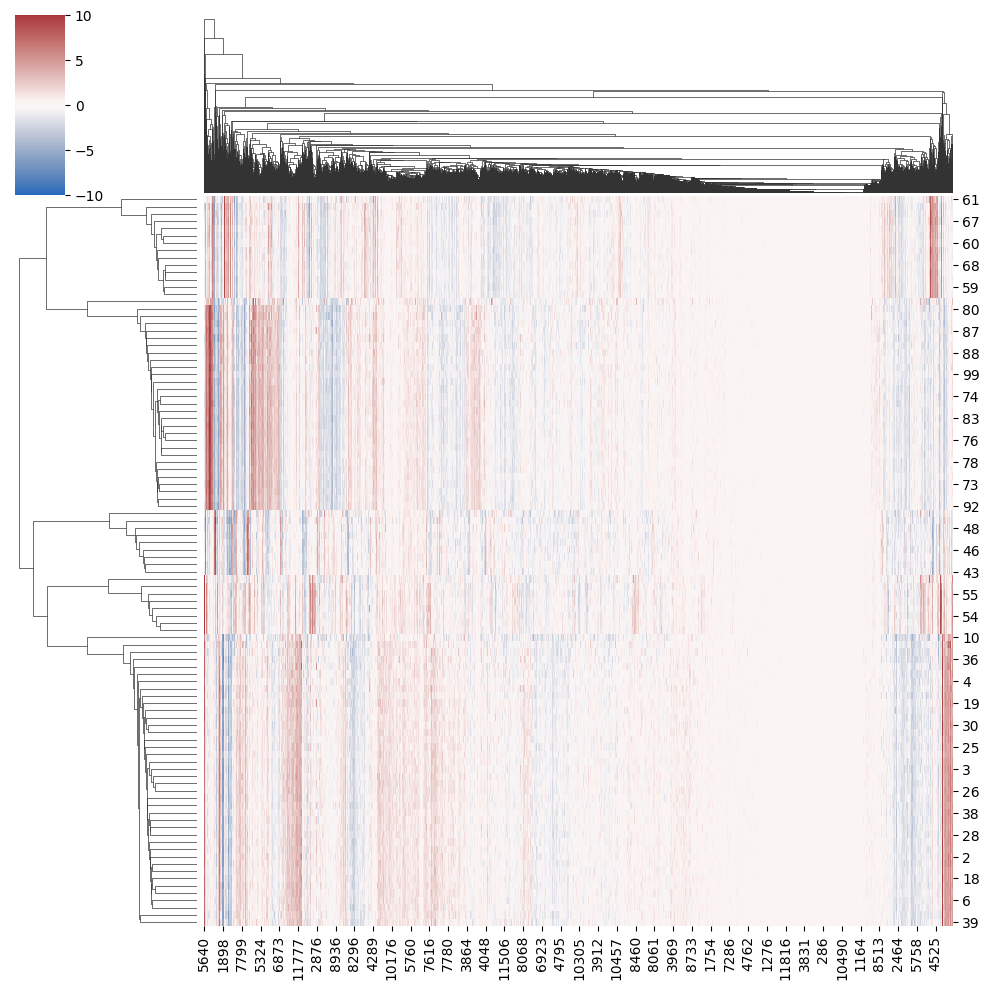

In [23]:
plt.figure(figsize=(14, 14))
sns.clustermap(df[cols_expr].values[:100], vmin=-10, vmax=10, cmap='vlag', center=0)
#plt.savefig('test.png', dpi=600)
plt.show()

In [10]:
df = df.fillna(0)

In [11]:
X = df[cols_expr].values

In [12]:
X_ = df_[cols_expr].values

In [13]:
target = ['lincs'] * X_.shape[0] + ['tahoe'] * X.shape[0]

In [14]:
X_out = np.concat([X_, X])

In [15]:
data = pd.DataFrame(X_out)

In [16]:
data['dataset'] = target

In [17]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X_out)

In [18]:
data['pc1'] = X_new[:, 0]
data['pc2'] = X_new[:, 1]

<Axes: xlabel='pc1', ylabel='pc2'>

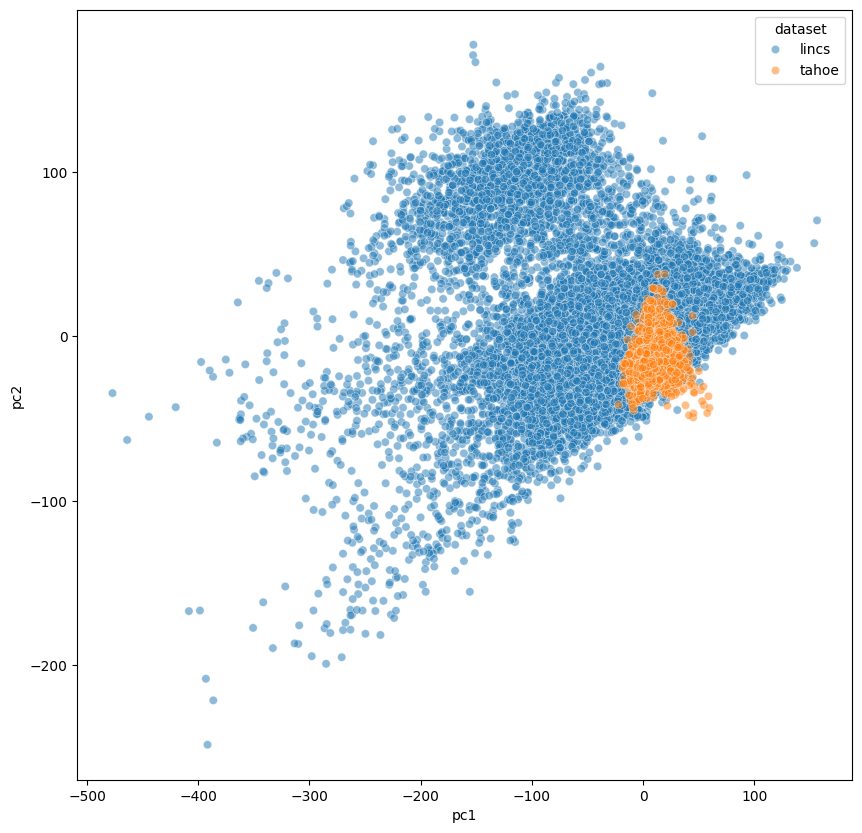

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=data, x='pc1', y='pc2', hue='dataset',  alpha=0.5)

In [37]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [38]:
df['pc1'] = X_new[:, 0]
df['pc2'] = X_new[:, 1]

In [39]:
df

,index,cl_sm_dose,cell_line,drug,dose,pubchem_cid,cell_line_drug,responses,smiles,fps_0,...,9988,9989,999,9990,9991,9992,9993,9997,pc1,pc2
0,67,CVCL_0069_APTO-253_0.05,CVCL_0069,APTO-253,0.05,11960271,CVCL_0069_11960271,0.999736,CC1=C(C2=C(N1)C=CC(=C2)F)C3=NC4=C5C=CC=NC5=C6C...,0,...,0.545364,-1.035998,-1.050404,-1.013388,-0.448658,0.000000,0.854815,0.973242,-47.999579,-10.092137
1,68,CVCL_0069_AZD-7648_0.05,CVCL_0069,AZD-7648,0.05,135151360,CVCL_0069_135151360,0.988290,CC1=CC2=NC=NN2C=C1NC3=NC=C4C(=N3)N(C(=O)N4C)C5...,0,...,0.757024,-1.073870,-2.592207,0.059973,-0.165119,0.000000,1.028941,0.734825,-49.059356,-8.292658
2,69,CVCL_0069_AZD-8055_0.05,CVCL_0069,AZD-8055,0.05,25262965,CVCL_0069_25262965,0.786794,CC1COCCN1C2=NC(=NC3=C2C=CC(=N3)C4=CC(=C(C=C4)O...,0,...,0.991741,-0.928049,-2.631717,-0.415128,-0.756783,0.000000,1.175194,0.140158,-46.374472,-13.270352
3,70,CVCL_0069_AZD1390_0.05,CVCL_0069,AZD1390,0.05,126689157,CVCL_0069_126689157,1.000000,CC(C)N1C2=C(C=NC3=CC(=C(C=C32)C4=CN=C(C=C4)OCC...,0,...,1.088643,-1.030269,-2.495177,-0.635733,-0.632332,0.000000,1.110014,0.363301,-49.276588,-11.832424
4,71,CVCL_0069_Afatinib_0.05,CVCL_0069,Afatinib,0.05,10184653,CVCL_0069_10184653,0.990883,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,0,...,-0.713355,-1.472717,-0.487054,0.452793,-0.250100,0.000000,0.337853,0.223940,-41.675277,-1.260780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,7978,CVCL_1731_5-Fluorouracil_0.5,CVCL_1731,5-Fluorouracil,0.50,3385,CVCL_1731_3385,0.923447,C1=C(C(=O)NC(=O)N1)F,0,...,-1.846971,-0.312898,0.630495,-0.011337,0.936636,0.113086,-0.798684,0.454878,-8.898930,31.229136
3317,7981,CVCL_1731_Belinostat_0.5,CVCL_1731,Belinostat,0.50,6918638,CVCL_1731_6918638,0.912687,C1=CC=C(C=C1)NS(=O)(=O)C2=CC=CC(=C2)C=CC(=O)NO,0,...,-1.668616,-0.228991,-0.926570,-0.181311,1.156408,0.000000,-0.016793,0.744082,-12.240520,11.853206
3318,7990,CVCL_1731_Fulvestrant_0.5,CVCL_1731,Fulvestrant,0.50,104741,CVCL_1731_104741,0.901148,CC12CCC3C(C1CCC2O)C(CC4=C3C=CC(=C4)O)CCCCCCCCC...,0,...,-1.319940,-0.924046,-1.253834,-1.525262,1.179120,0.200925,0.015409,0.524940,-9.360772,36.211441
3319,7997,CVCL_1731_Panobinostat_0.5,CVCL_1731,Panobinostat,0.50,6918837,CVCL_1731_6918837,0.470417,CC1=C(C2=CC=CC=C2N1)CCNCC3=CC=C(C=C3)C=CC(=O)NO,0,...,-0.687915,-3.087473,-0.539735,1.091674,-1.113487,0.000000,0.600180,0.755800,-9.940155,-18.766271


<Axes: xlabel='pc1', ylabel='pc2'>

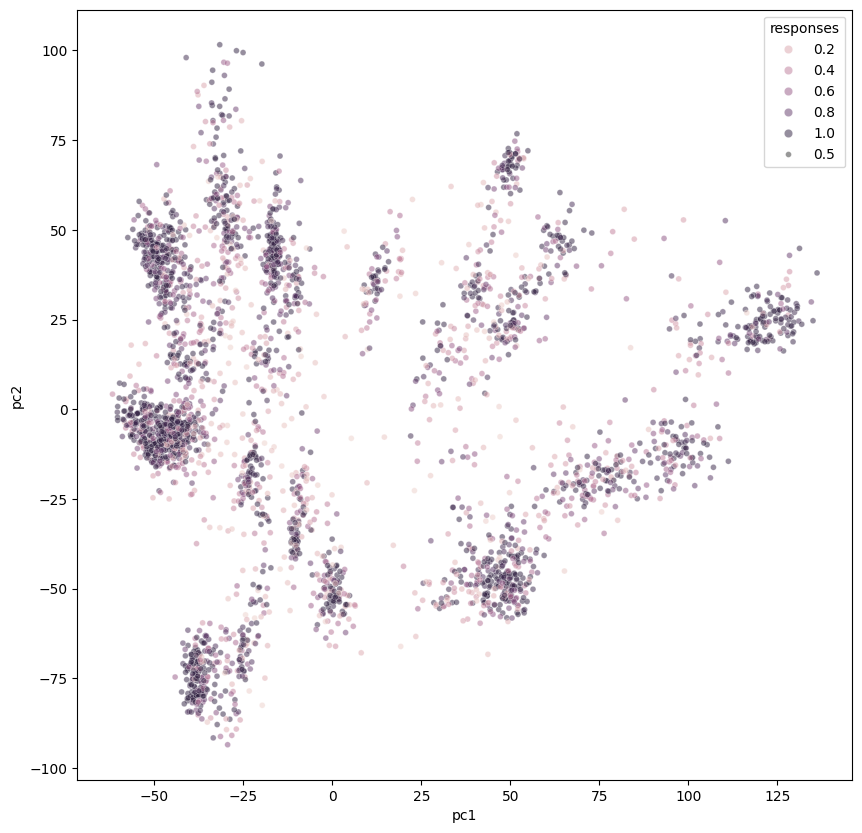

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='responses', alpha=0.5)

<Axes: xlabel='pc1', ylabel='pc2'>

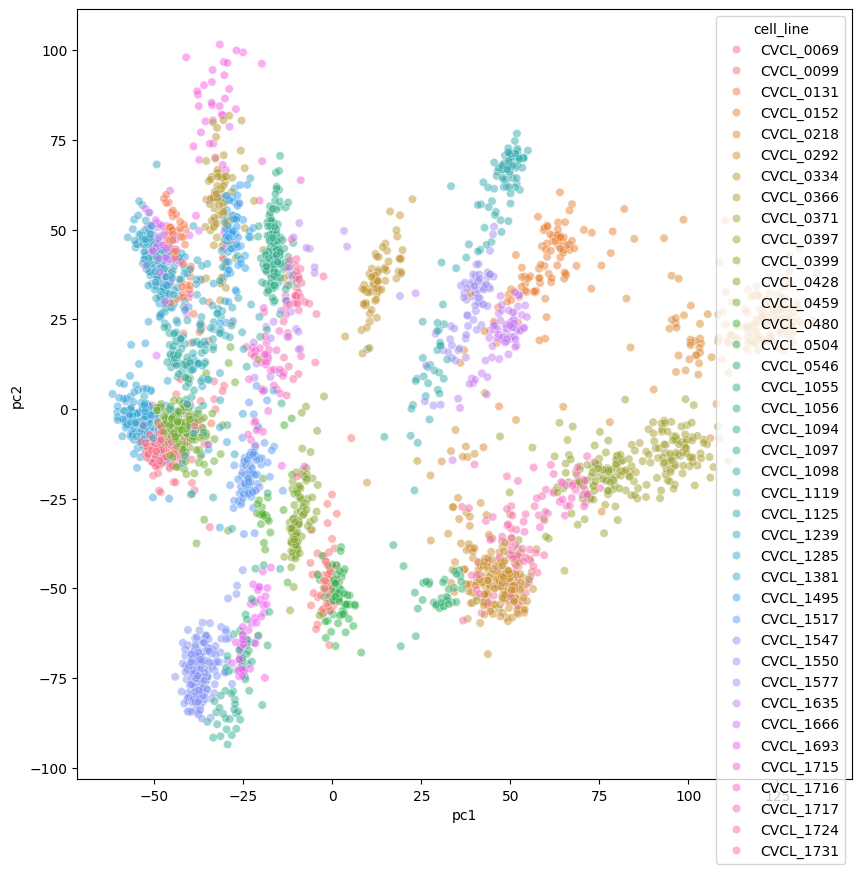

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='cell_line', alpha=0.5)